<a href="https://colab.research.google.com/github/anuragverse/ML-Workshop/blob/main/Object_Detection_using_Yolov3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the path to your image: /content/81SU3K0068L.jpg


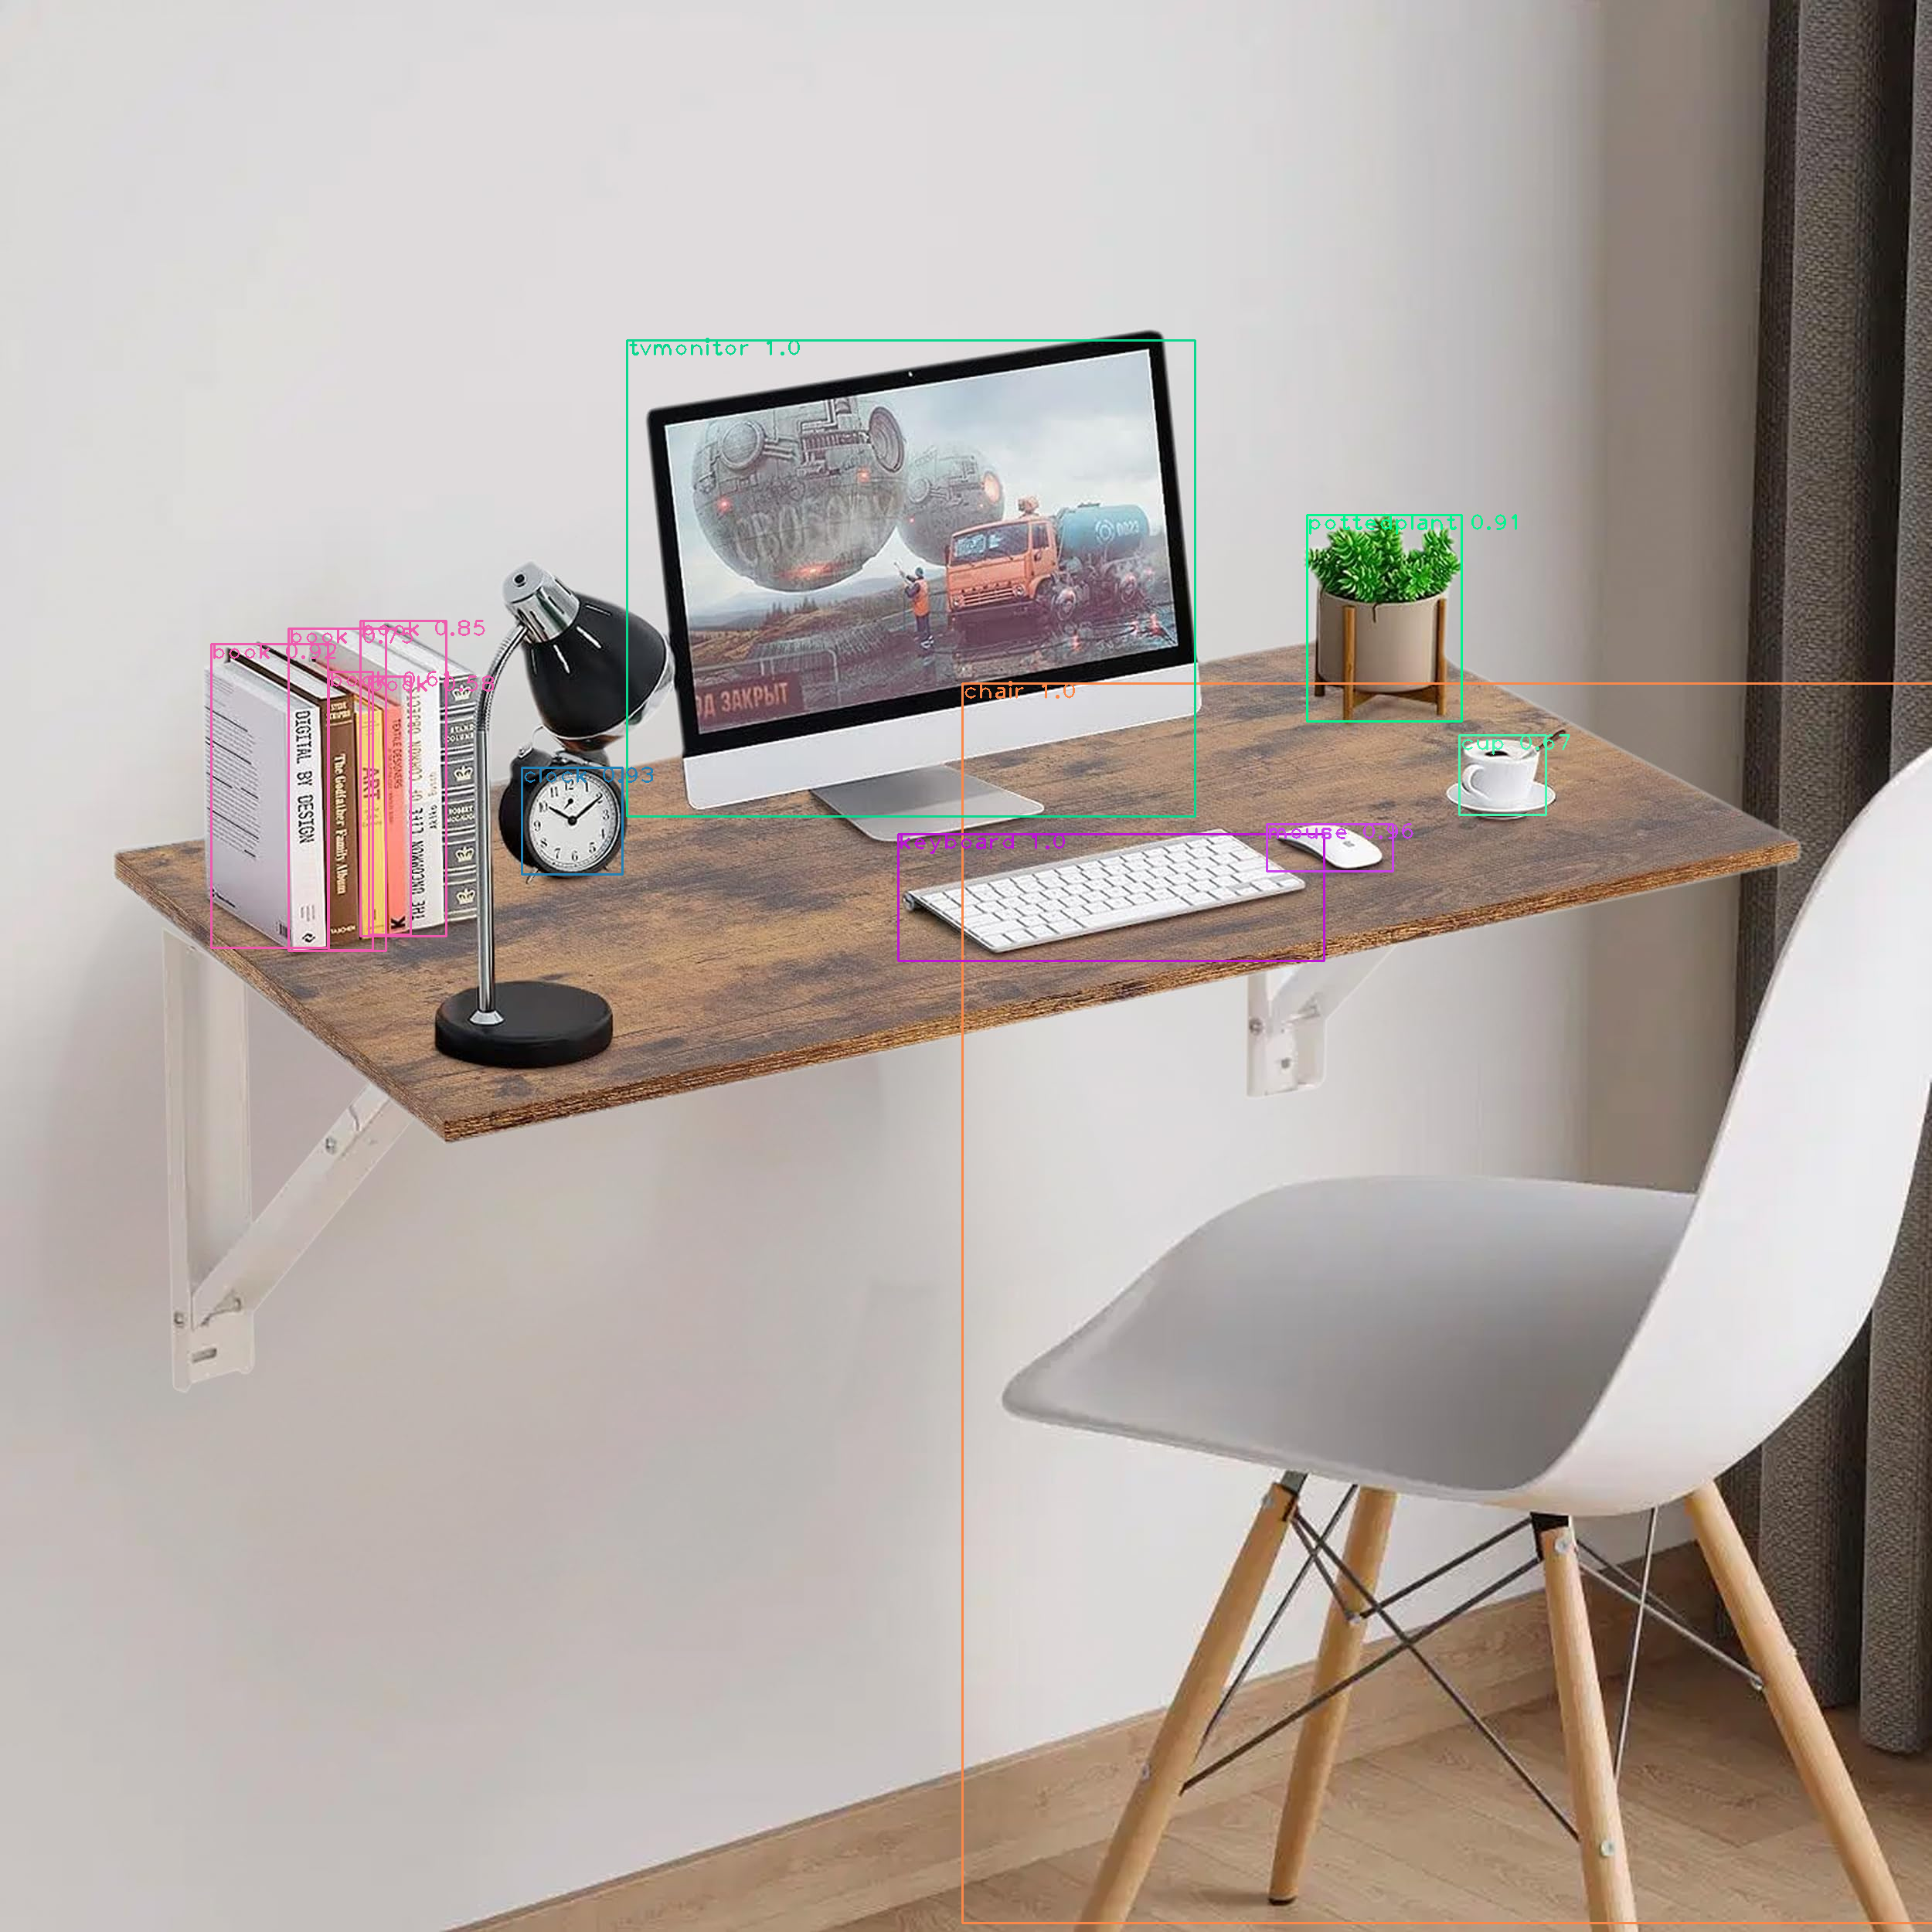

In [16]:
!pip install opencv-python

import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load YOLOv3 model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")  # Replace with your paths

# Load class names from COCO dataset
classes = []
with open("coco.names", "r") as f:  # Replace with your path
    classes = [line.strip() for line in f.readlines()]

# Function to perform object detection
def detect_objects(image_path):
    image = cv2.imread(image_path)
    height, width, channels = image.shape

    # Preprocess image
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layer names
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    # Perform object detection
    outs = net.forward(output_layers)

    # Process detections
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Confidence threshold
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-maxima suppression
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes and labels
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(classes), 3))
    if len(indexes) > 0:  # Check if indexes is not empty
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            color = colors[class_ids[i]]
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, label + " " + confidence, (x, y + 20), font, 2, color, 2)

    # Display output using cv2_imshow
    cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Get image path from user
image_path = input("Enter the path to your image: ")

# Perform object detection
detect_objects(image_path)